In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow #for image display
from skimage import io
from PIL import Image
import matplotlib.pylab as plt


[[207. 207. 207. ... 244. 244. 244.]
 [207. 207. 208. ... 244. 244. 244.]
 [208. 208. 208. ... 244. 244. 244.]
 ...
 [201. 206. 210. ... 120. 120. 120.]
 [199. 204. 209. ... 121. 121. 120.]
 [191. 197. 202. ... 122. 121. 120.]]


(720, 960)

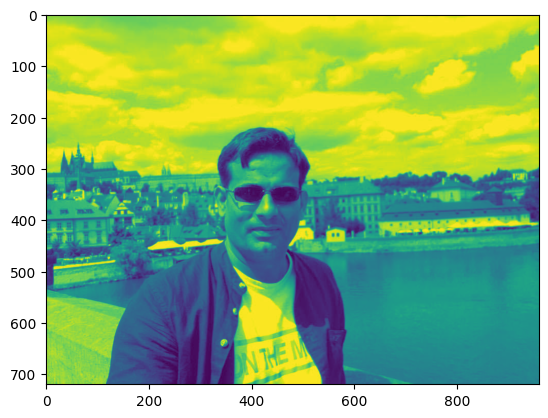

In [ ]:
from types import GeneratorType
#load image
url = "https://channeli.in/api/django_filemanager/media_files/12069/"
myImg = io.imread(url) #there are 3 bands-- RBG
gray_image = cv.cvtColor(myImg, cv.COLOR_BGR2GRAY) #to covert image into 2D array. it will calculate average of sum of pixels from all 3 bands
img_mat = np.array(list(gray_image), float)
print(img_mat)
img_mat.shape
plt.imshow(img_mat)
img_mat.shape

In [ ]:
# scale the image matrix before SVD. mean will become zero and standard deviation will become 1
img_mat_scaled = (img_mat - np.mean(img_mat)) / np.std(img_mat)

In [ ]:
U, s, V=np.linalg.svd(img_mat_scaled)

In [ ]:
# Compute Variance explained by each singukar vector
var_explained = np.round(s**2/np.sum(s**2), decimals=3)

TypeError: FigureCanvasAgg.print_png() got an unexpected keyword argument 'fipsize'

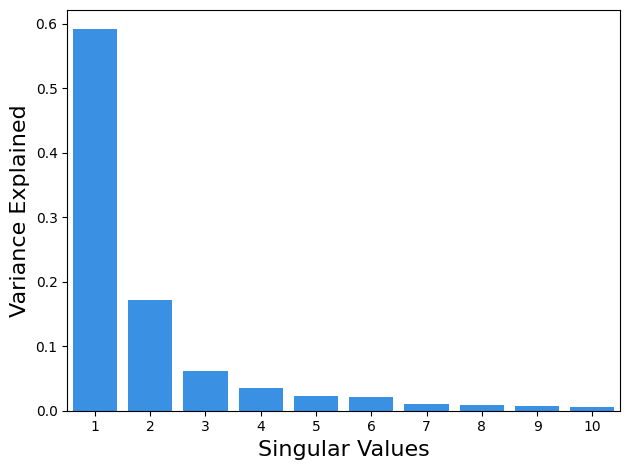

In [ ]:
import seaborn as sns
sns.barplot(x=list(range(1,11)), #first 10 singular vectors
            y=var_explained[0:10], color="dodgerblue") #variance explained by these singular vectors
plt.xlabel('Singular Values', fontsize=16)
plt.ylabel('Variance Explained', fontsize=16)
plt.tight_layout()
plt.savefig('svd_scree_plot.png',dpi=150, fipsize=(8,8))


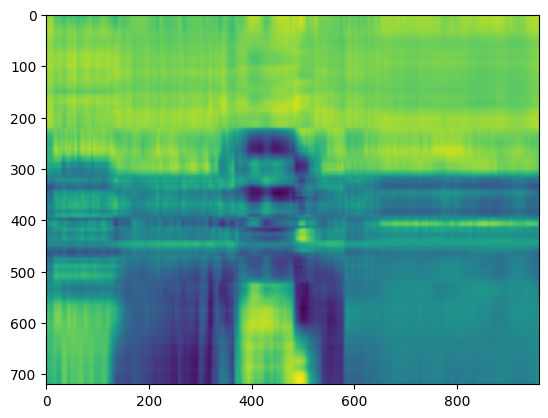

In [ ]:
num_components = 5 #reconstruct with only first 5 singular values
reconst_img_5 = np.array(U[:, 0:num_components]).dot(np.diag(s[0:num_components])).dot(np.array(V[0:num_components, :]))
plt.imshow(reconst_img_5)

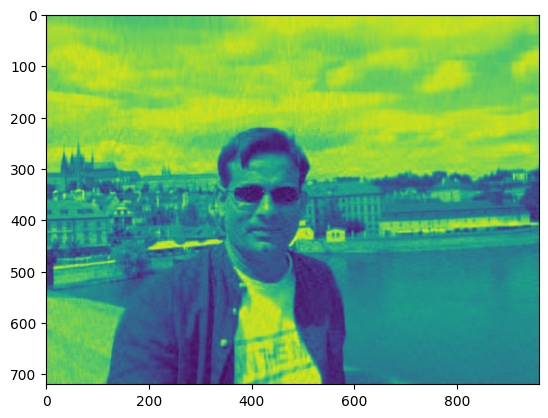

In [ ]:
num_components = 50 #reconstruct with only first 50 singular values
reconst_img_50 = np.array(U[:, 0:num_components]).dot(np.diag(s[0:num_components])).dot(np.array(V[0:num_components, :]))
plt.imshow(reconst_img_50)

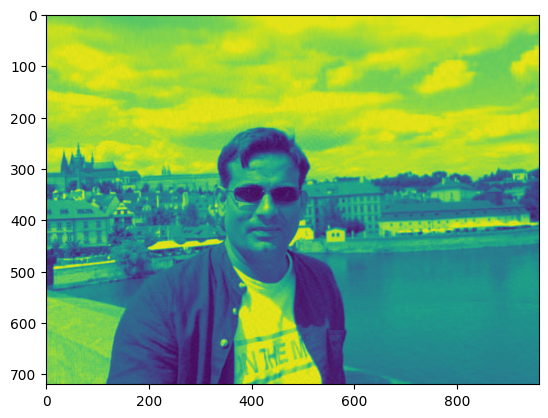

In [ ]:
num_components = 100 #reconstruct with only first 100 singular values
reconst_img_100 = np.array(U[:, 0:num_components]).dot(np.diag(s[0:num_components])).dot(np.array(V[0:num_components, :]))
plt.imshow(reconst_img_100)

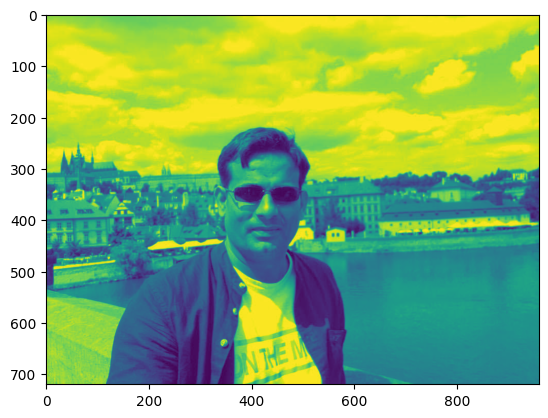

In [ ]:
num_components = 650 #reconstruct with only first 650 singular values
reconst_img_650 = np.array(U[:, 0:num_components]).dot(np.diag(s[0:num_components])).dot(np.array(V[0:num_components, :]))
plt.imshow(reconst_img_650)

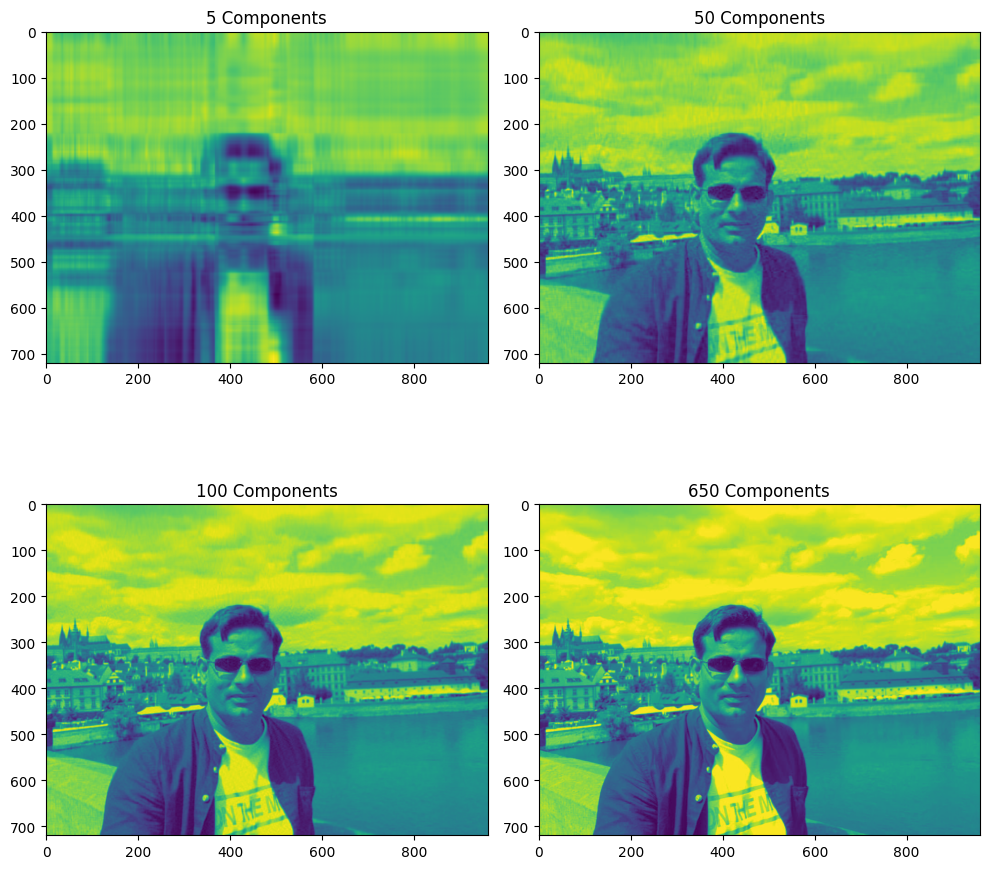

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0,0].imshow(reconst_img_5)
axs[0,0].set_title('5 Components')
axs[0,1].imshow(reconst_img_50)
axs[0,1].set_title('50 Components')
axs[1,0].imshow(reconst_img_100)
axs[1,0].set_title('100 Components')
axs[1,1].imshow(reconst_img_650)
axs[1,1].set_title('650 Components')
plt.tight_layout()
